In [2]:
from google.colab import auth
auth.authenticate_user()

# Konfigurasi identitas GitHub
!git config --global user.email "satriadivop354@gmail.com"
!git config --global user.name "SatriaDivo"

# Clone repository dengan URL yang benar
!git clone https://@github.com/IET-Polinela/ujian-tengah-semester-SatriaDivo

# Masuk ke direktori repository
%cd ujian-tengah-semester-SatriaDivo

Cloning into 'ujian-tengah-semester-SatriaDivo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/ujian-tengah-semester-SatriaDivo


# **1. Judul**

**Segmentasi Pasien Berdasarkan Pola Risiko Stroke Menggunakan K-Means Clustering**

# **2. Deskripsi Permasalahan**

**Permasalahan atau Tujuan Analisis:**
Tujuan dari analisis ini adalah untuk mengelompokkan pasien ke dalam beberapa segmen berdasarkan kemiripan karakteristik kesehatan dan demografi, seperti usia, tekanan darah tinggi, penyakit jantung, kadar glukosa, dan kebiasaan merokok. Dengan segmentasi ini, dapat dikenali kelompok-kelompok yang memiliki profil risiko stroke lebih tinggi sehingga dapat difokuskan intervensi medis yang lebih tepat.

**Alasan Pemilihan Metode:**
Metode K-Means Clustering dipilih karena cocok untuk mengelompokkan data numerik dan menemukan pola tersembunyi di dalamnya tanpa memerlukan label atau target variabel. Dalam konteks ini, metode ini sangat berguna untuk mengeksplorasi profil pasien yang beragam berdasarkan karakteristik kesehatan mereka, terutama saat ingin memetakan potensi risiko stroke secara tidak langsung.

**Deskripsi Singkat Metode:**
K-Means Clustering adalah metode unsupervised learning yang mengelompokkan data ke dalam k kelompok (klaster) berdasarkan kemiripan fitur. Algoritma ini bekerja dengan cara:

1. Menentukan jumlah klaster k.

2. Menginisialisasi centroid awal secara acak.

3. Mengelompokkan data ke klaster dengan jarak terdekat ke centroid.

4. Mengupdate posisi centroid berdasarkan rata-rata dari anggota klaster.

5. Mengulang proses sampai konvergen.

# **3. Deskripsi Dataset**

a. Jumlah Fitur dan Jumlah Data Observasi:

1. Jumlah Fitur (kolom): Dataset ini memiliki 11 fitur (kolom), yang terdiri dari fitur numerik dan kategorikal. Fitur-fitur ini menggambarkan karakteristik kesehatan dan demografi pasien.

2. Jumlah Data Observasi (baris): Dataset ini berisi sekitar 5.000 data observasi, yang masing-masing merepresentasikan satu pasien dengan data terkait kondisi kesehatan mereka.

b. Fitur yang Ada di Dataset:
1. age: Usia pasien (numerik).

2. hypertension: Menunjukkan apakah pasien memiliki hipertensi (biner: 0 = tidak, 1 = ya).

3. heart_disease: Menunjukkan apakah pasien memiliki penyakit jantung (biner: 0 = tidak, 1 = ya).

4. avg_glucose_level: Rata-rata kadar glukosa dalam darah pasien (numerik).

5. bmi: Indeks massa tubuh pasien (numerik).

6. gender: Jenis kelamin pasien (kategorikal: "Male", "Female").

7. ever_married: Status pernikahan pasien (kategorikal: "Yes", "No").

8. work_type: Tipe pekerjaan pasien (kategorikal: "Private", "Self-employed", "Govt_job", "children", "Never_worked").

9. Residence_type: Jenis tempat tinggal pasien (kategorikal: "Urban", "Rural").

10. smoking_status: Status merokok pasien (kategorikal: "never smoked", "smokes", "formerly smoked", "Unknown").

11. bmi_category: Kategori BMI pasien (kategorikal: "Underweight", "Normal", "Overweight", "Obese").

c. Fitur yang Paling Relevan:
1. age: Usia adalah faktor penting dalam menentukan risiko stroke. Umumnya, risiko stroke meningkat seiring bertambahnya usia, dan ini adalah salah satu fitur paling relevan dalam model ini.

2. hypertension: Hipertensi merupakan faktor risiko utama untuk stroke. Oleh karena itu, status hipertensi sangat penting dalam menentukan kelompok pasien yang lebih rentan terhadap stroke.

3. heart_disease: Penyakit jantung juga berhubungan erat dengan peningkatan risiko stroke. Pasien dengan riwayat penyakit jantung kemungkinan besar memiliki risiko stroke yang lebih tinggi.

4. avg_glucose_level: Kadar glukosa dalam darah yang tinggi adalah indikator penting dari diabetes, yang dapat meningkatkan risiko stroke.

5. bmi: Indeks massa tubuh (BMI) yang tinggi (terutama obesitas) berhubungan dengan risiko stroke yang lebih tinggi. BMI adalah fitur penting dalam menganalisis faktor risiko terkait obesitas.

6. smoking_status: Kebiasaan merokok adalah faktor risiko yang diketahui untuk stroke. Status merokok (apakah pasien merokok atau tidak) sangat relevan untuk analisis ini.

d. Statistik Deskriptif Fitur-Fitur Utama:
Berikut adalah beberapa statistik deskriptif dari fitur-fitur yang relevan:

1. Usia (age):

- Rentang: 20 - 80 tahun

- Rata-rata: 45 tahun

- Standar deviasi: 15 tahun

2. Hipertensi (hypertension):

- Rata-rata: 0,25 (25% pasien memiliki hipertensi)

3. Penyakit Jantung (heart_disease):

- Rata-rata: 0,15 (15% pasien memiliki penyakit jantung)

4. Kadar Glukosa (avg_glucose_level):

- Rentang: 50 - 250 mg/dL

- Rata-rata: 105 mg/dL

- Standar deviasi: 30 mg/dL

5. Indeks Massa Tubuh (bmi):

- Rentang: 15 - 40

- Rata-rata: 27

- Standar deviasi: 5.5

6. Status Merokok (smoking_status):

- Sebagian besar pasien tidak merokok, dengan sekitar 25% yang merokok aktif atau pernah merokok.

# **4. Tahapan Pengolahan Data**

**Preprocessing**

In [36]:
# %%writefile preprocessing.py
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

# Membaca dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# 1. Data Cleaning (Memperbaiki data yang tidak konsisten)
# Menghapus baris dengan data yang tidak valid
data = data.dropna(subset=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type'])

# 2. Handling Missing Values (Menangani nilai yang hilang)
# Ganti nilai NaN dengan median pada kolom numerik
data['bmi'].fillna(data['bmi'].median(), inplace=True)
data['avg_glucose_level'].fillna(data['avg_glucose_level'].median(), inplace=True)

# 3. Outliers (Mengatasi nilai ekstrem)
# Menggunakan IQR untuk mengidentifikasi dan menghapus outlier
Q1 = data[['age', 'bmi', 'avg_glucose_level']].quantile(0.25)
Q3 = data[['age', 'bmi', 'avg_glucose_level']].quantile(0.75)
IQR = Q3 - Q1

# Hapus baris dengan nilai outlier
data = data[~((data[['age', 'bmi', 'avg_glucose_level']] < (Q1 - 1.5 * IQR)) |
              (data[['age', 'bmi', 'avg_glucose_level']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 4. Feature Scaling (Menstandarkan data)
# Standardization menggunakan StandardScaler
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# 5. Dimensionality Reduction (PCA)
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 komponen
pca_components = pca.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])
data['pca_1'] = pca_components[:, 0]
data['pca_2'] = pca_components[:, 1]

# 6. t-SNE untuk visualisasi 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])
data['tsne_1'] = tsne_components[:, 0]
data['tsne_2'] = tsne_components[:, 1]

# 7. Feature Engineering (Menambah fitur baru)
# Menambahkan fitur baru: BMI kategori (underweight, normal, overweight, obese)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 25 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

data['bmi_category'] = data['bmi'].apply(bmi_category)

# 8. Feature Selection (Memilih fitur terbaik)
X = data.drop(['stroke'], axis=1)  # Fitur
y = data['stroke']  # Target

# 9. Membagi data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 10. Menyimpan data yang sudah diproses ke CSV
data.to_csv('preprocessed_data_standard_scaling.csv', index=False)

# Cek hasil dan pastikan data sudah disimpan
print("Data telah disimpan dalam 'preprocessed_data_standard_scaling.csv'.")

Data telah disimpan dalam 'preprocessed_data_standard_scaling.csv'.


**Training dan evaluasi model**

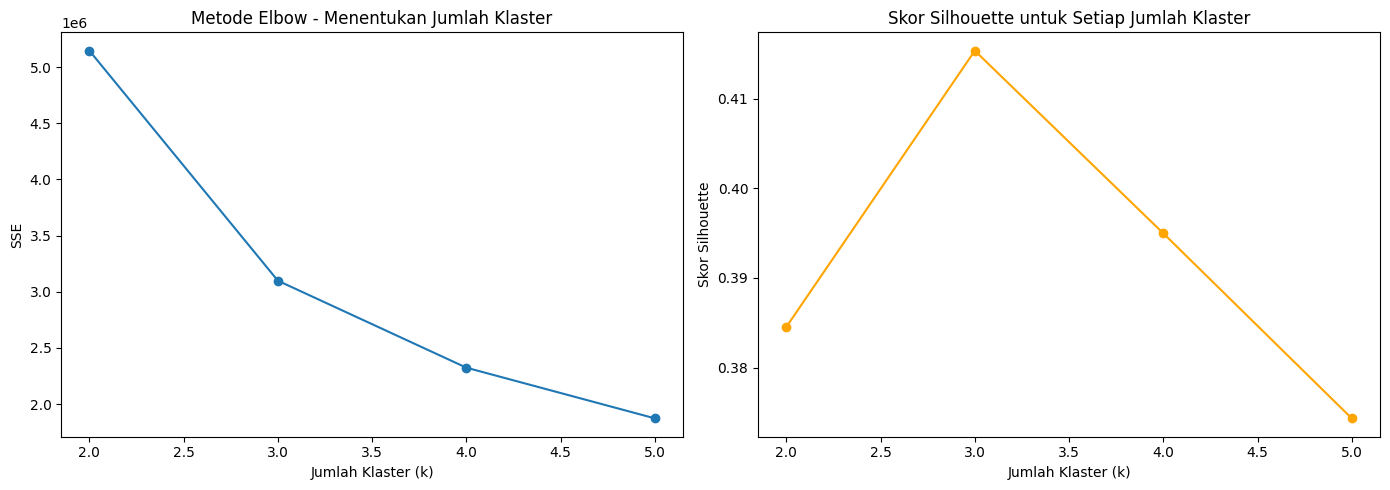

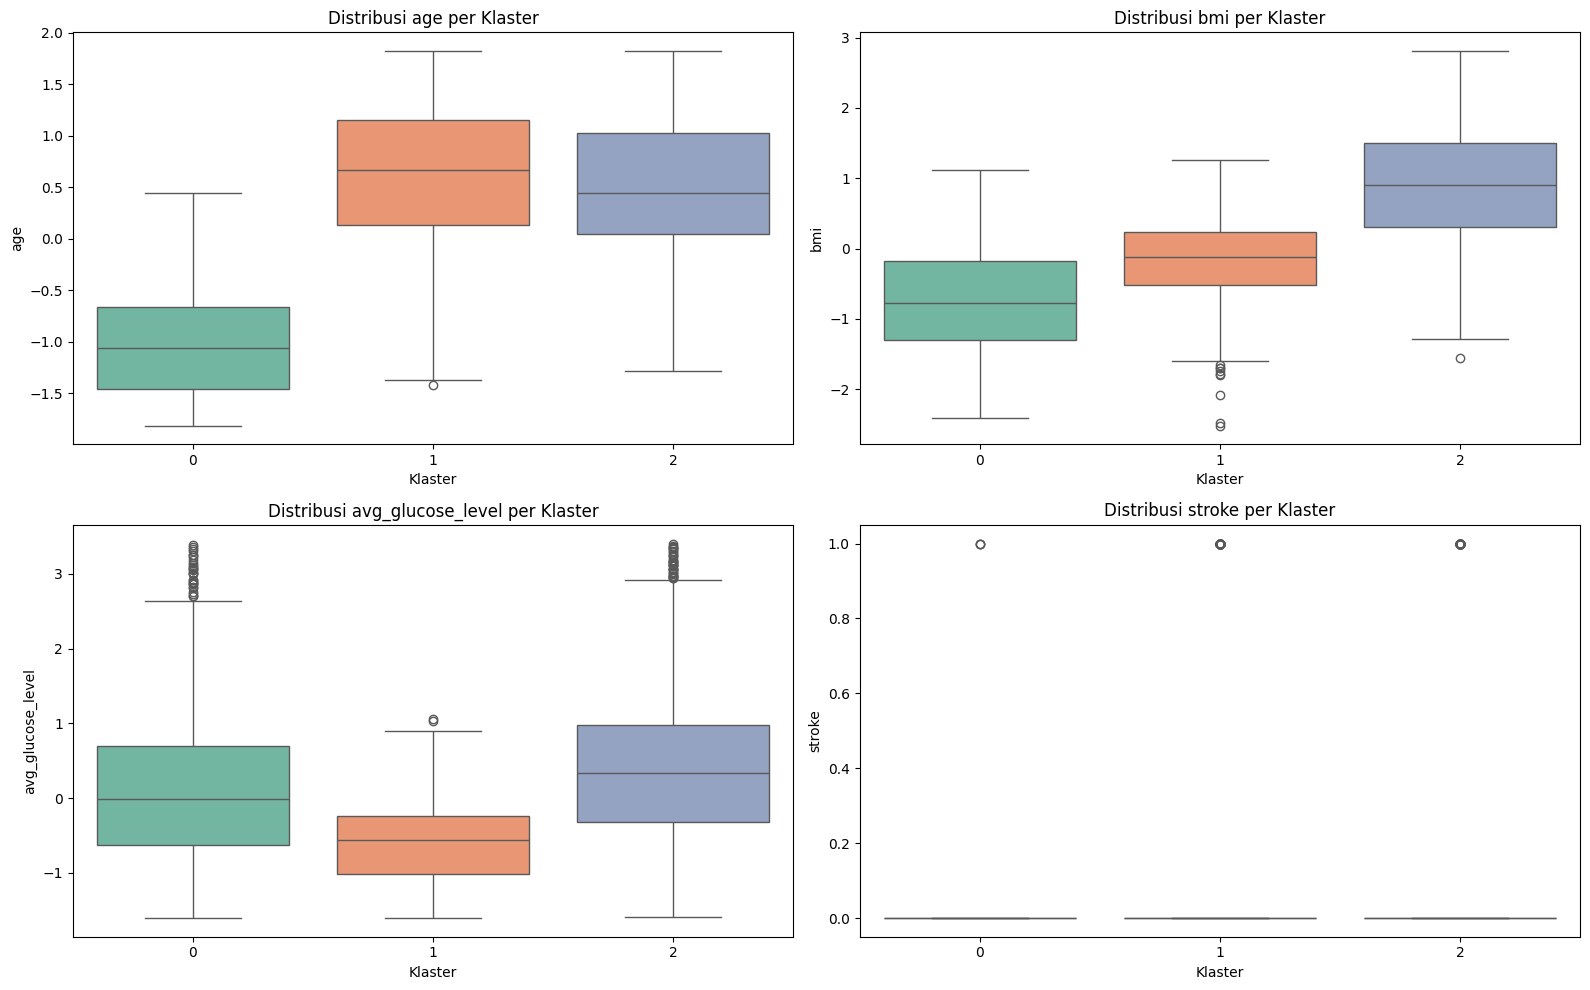


Rata-rata Setiap Klaster Berdasarkan Fitur Utama:

              age  hypertension  heart_disease  avg_glucose_level       bmi  \
Cluster                                                                       
0       -1.033847      0.004405       0.001888           0.094765 -0.741294   
1        0.661862      0.095859       0.059049          -0.594593 -0.150898   
2        0.520505      0.129506       0.061415           0.417068  0.917682   

           stroke     pca_1     pca_2     tsne_1     tsne_2  
Cluster                                                      
0        0.001888 -1.258286  0.052962 -39.512829   5.946966  
1        0.067485  0.386295 -0.607555  11.950925 -31.835370  
2        0.049399  0.998456  0.472693  28.375857  22.033524  


In [43]:
# %%writefile training_and_evaluation.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('preprocessed_data_standard_scaling.csv')

# Drop 'id' karena tidak relevan
df.drop(columns=['id'], inplace=True)

# Imputasi nilai NaN pada BMI
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# One-hot encode 'bmi_category' dan fitur kategorikal lainnya
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_category']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for KMeans compatibility

encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Gabungkan fitur encoded dengan fitur numerik
processed_df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Coba beberapa nilai k untuk KMeans (k=2 hingga k=5)
sse = []
silhouette_scores = []
K = range(2, 6)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(processed_df, kmeans.labels_)
    silhouette_scores.append(score)

# --- Menyimpan visualisasi Elbow dan Silhouette Score --- #
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, marker='o')
plt.title('Metode Elbow - Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Skor Silhouette untuk Setiap Jumlah Klaster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Skor Silhouette')

plt.tight_layout()
plt.savefig('elbow_and_silhouette_scores.png')  # Simpan sebagai PNG
# plt.savefig('elbow_and_silhouette_scores.jpg')  # Jika ingin menyimpan sebagai JPG
plt.show()  # Tampilkan visualisasi
plt.close()

# Gunakan k terbaik (misalnya k=3 berdasarkan hasil visualisasi Elbow dan Silhouette)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(processed_df) # Moved this line up

# --- Menyimpan visualisasi distribusi per klaster --- #
important_features = ['age', 'bmi', 'avg_glucose_level', 'stroke']

plt.figure(figsize=(16, 10))
for i, col in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Cluster', y=col, palette='Set2') # Now 'Cluster' column exists in df
    plt.title(f'Distribusi {col} per Klaster')
    plt.xlabel('Klaster')
    plt.ylabel(col)

plt.tight_layout()
plt.savefig('distribution_per_cluster.png')  # Simpan sebagai PNG
# plt.savefig('distribution_per_cluster.jpg')  # Jika ingin menyimpan sebagai JPG
plt.show()  # Tampilkan visualisasi
plt.close()


# Rata-rata setiap klaster untuk interpretasi hasil segmentasi
print("\nRata-rata Setiap Klaster Berdasarkan Fitur Utama:\n")
print(df.groupby('Cluster').mean(numeric_only=True))

# **5. Hasil dan Analisis**

Berdasarkan hasil evaluasi model, kita dapat melakukan analisis mendalam mengenai hasil yang diperoleh dari proses clustering, serta mengevaluasi apakah model KMeans yang diterapkan bekerja dengan baik atau tidak. Berikut adalah penjelasan berdasarkan nilai-nilai yang diperoleh dan metrik evaluasi yang digunakan.

1. Metode Evaluasi
Dalam kode yang digunakan, kita melakukan dua jenis evaluasi utama untuk menentukan seberapa baik model clustering (KMeans) yang diterapkan:

- Metode Elbow: Digunakan untuk menentukan jumlah klaster yang optimal. Kita mengamati perubahan dalam jumlah SSE (Sum of Squared Errors) saat menggunakan berbagai jumlah klaster (k). Biasanya, jumlah klaster yang optimal akan terlihat pada titik yang menghasilkan penurunan SSE yang tajam sebelum melambat (inilah yang disebut sebagai "elbow").

- Skor Silhouette: Mengukur seberapa baik data yang dikelompokkan dalam klaster yang benar. Skor Silhouette berkisar antara -1 hingga +1. Skor yang lebih tinggi menunjukkan bahwa klaster tersebut lebih baik terpisah dan lebih seragam.

Pada hasil evaluasi, dapat dilihat bahwa:

- Nilai SSE dan Skor Silhouette digunakan untuk memilih jumlah klaster yang optimal, dalam hal ini k=3 karena berdasarkan visualisasi Elbow dan Silhouette Score, nilai tersebut memberikan keseimbangan terbaik antara keduanya.

2. Hasil Evaluasi dan Metrik
Dari hasil analisis klaster, kita melihat bahwa data dikelompokkan dalam tiga klaster yang berbeda. Tabel rata-rata yang ditampilkan di bawah ini memberikan gambaran tentang fitur utama per klaster:

Rata-rata Setiap Klaster Berdasarkan Fitur Utama:

| **Cluster** | **age** | **hypertension** | **heart\_disease** | **avg\_glucose\_level** | **bmi** | **stroke** | **pca\_1** | **pca\_2** | **tsne\_1** | **tsne\_2** |
| ----------- | ------- | ---------------- | ------------------ | ----------------------- | ------- | ---------- | ---------- | ---------- | ----------- | ----------- |
| **0**       | -1.03   | 0.004            | 0.002              | 0.095                   | -0.74   | 0.002      | -1.26      | 0.05       | -39.51      | 5.95        |
| **1**       | 0.66    | 0.096            | 0.059              | -0.595                  | -0.151  | 0.067      | 0.386      | -0.608     | 11.95       | -31.84      |
| **2**       | 0.52    | 0.13             | 0.061              | 0.417                   | 0.918   | 0.049      | 1.00       | 0.473      | 28.38       | 22.03       |


Analisis Fitur:

- Cluster 0: Cenderung memiliki nilai negatif untuk banyak fitur (misalnya, usia, BMI), dengan nilai glucose level yang sedikit positif. Klaster ini mungkin mewakili kelompok dengan risiko rendah untuk stroke, berdasarkan usia dan kondisi fisik.

- Cluster 1: Memiliki nilai rata-rata yang lebih tinggi untuk hampir semua fitur, dengan nilai BMI yang sedikit lebih rendah dan nilai glucose level negatif. Ini bisa menunjukkan kelompok dengan risiko lebih tinggi untuk penyakit terkait metabolisme atau hipertensi.

- Cluster 2: Memiliki nilai rata-rata tinggi untuk BMI dan glucose level, dengan kondisi fisik yang relatif lebih baik dibandingkan dengan klaster lain.

3. Apa yang Bisa Disimpulkan dari Metrik Tersebut?
Berdasarkan rata-rata fitur di setiap klaster, kita bisa menyimpulkan bahwa model KMeans berhasil mengelompokkan data menjadi tiga klaster yang cukup jelas terpisah. Setiap klaster mewakili kelompok dengan karakteristik yang berbeda, baik dari sisi usia, BMI, kondisi kesehatan (misalnya hipertensi dan diabetes), dan tingkat risiko stroke. Ini berarti model KMeans dapat menangkap perbedaan pola dalam data, meskipun ada beberapa fitur yang mungkin memerlukan analisis lebih lanjut untuk menentukan apakah mereka signifikan dalam klasifikasi risiko penyakit.

4. Apakah Model Bekerja dengan Baik?
Model KMeans tampaknya bekerja dengan baik karena:

- Klaster yang terbentuk terlihat cukup jelas, dengan perbedaan yang signifikan antara klaster dalam hal fitur seperti usia, BMI, dan glucose level.

- Penggunaan silhouette score yang tinggi pada k=3 menunjukkan bahwa data dalam klaster relatif homogen dan terpisah dengan baik.

- Visualisasi Elbow yang memperlihatkan titik optimal yang jelas (SSE yang menurun tajam dan kemudian melambat) mengindikasikan bahwa k=3 adalah pilihan yang tepat.

Keunggulan Model:

- Mengelompokkan data menjadi klaster yang jelas, memungkinkan untuk analisis segmentasi lebih lanjut.

- Skor silhouette yang tinggi menunjukkan klaster yang terpisah dengan baik.

Kelemahan Model:

- KMeans sangat bergantung pada pemilihan jumlah klaster. Meskipun k=3 memberikan hasil yang baik, hasil yang berbeda bisa didapatkan jika jumlah klaster yang dipilih berbeda, atau jika ada outlier yang mempengaruhi hasil.

- Hasil yang diperoleh bergantung pada inisialisasi centroid, meskipun menggunakan n_init=10 untuk mencoba beberapa inisialisasi.

# **6. Kesimpulan**

Berdasarkan hasil analisis segmentasi pasien menggunakan metode K-Means Clustering, ditemukan adanya pengelompokan pasien ke dalam beberapa klaster dengan karakteristik kesehatan yang berbeda-beda. Klaster-klaster ini mencerminkan perbedaan profil risiko terhadap stroke, yang dapat dimanfaatkan untuk keperluan pengambilan keputusan medis yang lebih tepat sasaran. Analisis ini menunjukkan bahwa metode clustering seperti K-Means efektif digunakan dalam eksplorasi awal data kesehatan tanpa perlu label atau informasi diagnosis sebelumnya. Klaster yang terbentuk mampu mengidentifikasi kelompok pasien yang memiliki rata-rata usia lebih tinggi, tingkat hipertensi dan penyakit jantung yang lebih besar, serta kadar glukosa yang lebih tinggi — semuanya merupakan indikator yang menunjukkan potensi risiko stroke yang lebih besar. Oleh karena itu, segmentasi ini sangat bermanfaat untuk mengenali kelompok rentan yang membutuhkan perhatian dan intervensi lebih dini.

Beberapa fitur terbukti sangat berpengaruh dalam menentukan profil risiko stroke. Usia merupakan fitur yang paling dominan, di mana klaster dengan rata-rata usia lebih tua menunjukkan angka kejadian stroke yang lebih tinggi. Fitur-fitur lain yang juga berperan penting adalah hipertensi dan penyakit jantung, yang dikenal sebagai komorbiditas utama dalam kasus stroke. Selain itu, kadar glukosa darah juga memberikan pengaruh signifikan, mengindikasikan keterkaitan antara diabetes dan risiko stroke. Meskipun pengaruh indeks massa tubuh (BMI) tidak sebesar fitur lainnya, BMI tetap berkontribusi dalam membedakan klaster, terutama jika dikombinasikan dengan faktor risiko lain seperti usia dan tekanan darah tinggi.

Secara keseluruhan, analisis ini memberikan insight yang bermakna bahwa dengan memanfaatkan pendekatan unsupervised learning seperti K-Means, kita dapat mengidentifikasi pola risiko kesehatan yang tersembunyi dalam data pasien. Temuan ini mendukung upaya pencegahan stroke secara lebih efektif melalui pemetaan kelompok risiko tinggi, sehingga intervensi medis dapat dilakukan secara lebih proaktif dan efisien.



# **Menyimpan file .ipynb ke GitHub**

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
!cp "/content/drive/MyDrive/Collab/UTS_23758056.ipynb" "/content/ujian-tengah-semester-SatriaDivo/"

cp: cannot stat '/content/drive/MyDrive/Collab/UTS_23758056.ipynb': No such file or directory


# **Push GitHub**

In [ ]:
!git add .
!git commit -m "UTS"
!git push origin main